In [3]:
!pip install jieba
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 640.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 930.9 kB/s eta 0:00:01
   ------------------------- -------------- 194.6/300.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 245.8/300.2 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00


In [74]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 指定維基百科頁面的URL
url = "https://zh.wikipedia.org/wiki/%E6%B8%A9%E5%B8%83%E5%B0%94%E7%99%BB%E7%BD%91%E7%90%83%E9%94%A6%E6%A0%87%E8%B5%9B%E7%94%B7%E5%AD%90%E5%8D%95%E6%89%93%E5%86%A0%E5%86%9B%E5%88%97%E8%A1%A8"

# 發送GET請求並解析HTML
res = requests.get(url)
soup = BeautifulSoup(res.text, "html.parser")

# 找到第一個表格
table = soup.find("table")

# 提取表格的數據
rows = table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all(["th", "td"])
    cols = [col.get_text(strip=True) for col in cols]
    data.append(cols)

# 將數據轉換為DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

# 進行文本清理（移除括號及其內容）
df = df.applymap(lambda x: re.sub(r'\([^)]*\)', '', x) if isinstance(x, str) else x)
# 清理全形括號
df = df.applymap(lambda x: re.sub(r'\（[^)]*\）', '', x) if isinstance(x, str) else x)
# 清理前全形、後半形括號(在亞軍的第50行，這個超陰險，差點沒看到!)
df = df.applymap(lambda x: re.sub(r'\（[^)]*\)', '', x) if isinstance(x, str) else x)


# 移除DataFrame中的第52行
df = df.drop(52, axis=0)

# 重新設置索引
df = df.reset_index(drop=True)

# 顯示DataFrame
df


,年份,冠军,亚军,比分
0,1968年,罗德·拉沃,托尼·罗奇,6-3、6-4、6-2
1,1969年,罗德·拉沃,約翰·紐康姆,6-4、5-7、6-4、6-4
2,1970年,約翰·紐康姆,肯·罗斯沃尔,5-7、6-3、6-2、3-6、6-1
3,1971年,約翰·紐康姆,斯坦·史密斯,6-3、5-7、2-6、6-4、6-4
4,1972年,斯坦·史密斯,伊利耶·纳斯塔塞,4-6、6-3、6-3、4-6、7-5
5,1973年,扬·科德斯,梅特雷維里,6-1、9-8、6-3
6,1974年,康诺尔斯,肯·罗斯沃尔,6-1、6-1、6-4
7,1975年,亚瑟·阿什,吉米·康诺尔斯,6-1、6-1、5-7、6-4
8,1976年,比约恩·博里,伊利耶·纳斯塔塞,6-4、6-2、9-7
9,1977年,比约恩·博里,吉米·康诺尔斯,3-6、6-2、6-1、5-7、6-4


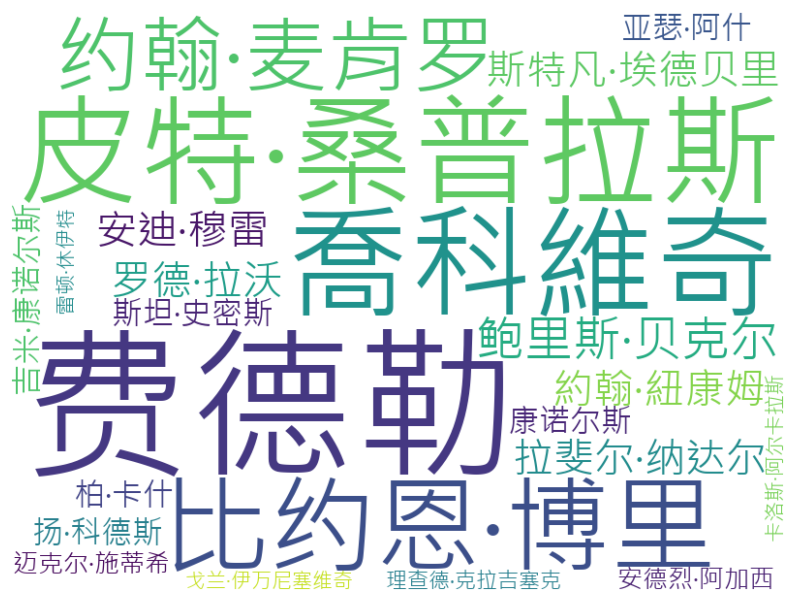

In [75]:
# 統計詞頻
word_freq = Counter(df['冠军'])

# 生成文字雲
font_path = "C:\\Users\\MIRDC\\AppData\\Local\\Microsoft\\Windows\\Fonts\\msjh.ttc"
wc = WordCloud(
    font_path=font_path,
    background_color="white",
    max_words=2000,
    width=800,
    height=600
)
wordcloud = wc.generate_from_frequencies(word_freq)

# 顯示文字雲
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud.png")

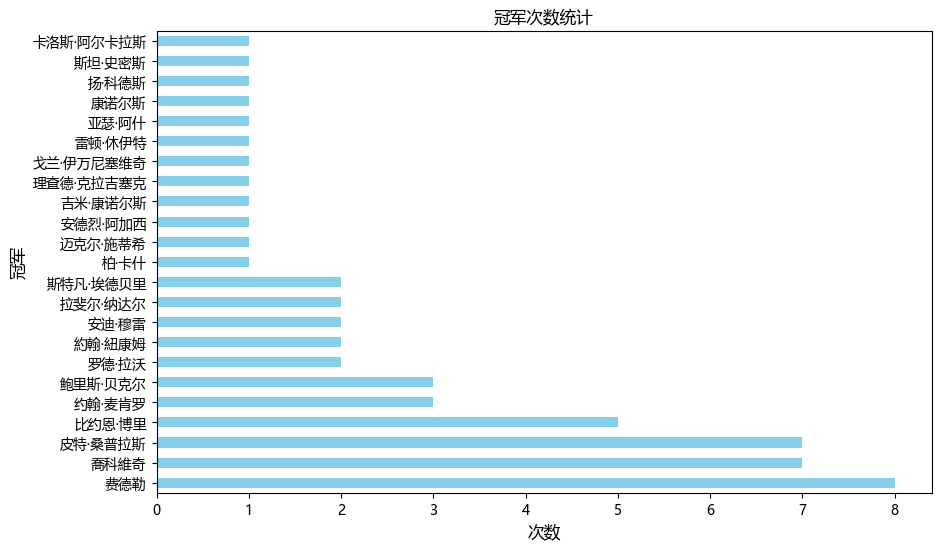

In [90]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 设置字体路径，替换成您系统中支持的中文字体路径
font_path = "C:\\Windows\\Fonts\\msyh.ttc"  # Microsoft YaHei

# 设置全局字体为中文可显示字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# 统计冠军列的数据
champion_counts = df['冠军'].value_counts()

# 创建水平长条图
plt.figure(figsize=(10, 6))
champion_counts.plot(kind='barh', color='skyblue')

# 设置中文字体
font = FontProperties(fname=font_path, size=12)
plt.title('冠军次数统计', fontproperties=font)
plt.xlabel('次数', fontproperties=font)
plt.ylabel('冠军', fontproperties=font)
plt.show()
